# Exploratory Data Analysis

## README

### Overview
This notebook presents the Exploratory Data Analysis (EDA) phase of a research project focused on investigating the spatio-temporal dynamics and influencing factors of NO₂ levels in the regions of interest, including both univariate and multivariate analyses.

### Objective
The main objective of this notebook is to:

- Summarize the statistical characteristics of NO₂ data and other covariates.

- Visualize temporal trends and spatial distributions of key variables.

- Explore correlations and feature importance.

- Generate insights to guide model development and hypothesis refinement.

### Workflow

1. **Data Loading and Merging**
   - Load geospatial datasets (NO₂ levels, temperature, population, road network, land use, etc.) and merge all the features into one file (*.gpkg*) for each day.

2. **Descriptive Analysis**
   - Examine distributions of NO₂ and covariates.

3. **Temporal Exploration**
   - Plot time-series patterns of sub-administrative region NO₂ over the year.
   - Analyze NO₂ lag effects and autocorrelations.

4. **Spatial Analysis**
   - Analyze NO₂ spacial autocorrelations.
   - Visualize NO₂ concentrations across grid cells, in different day types.
   - Plot other feature maps (e.g., population, land use, road density).
   
5. **Correlation be Feature Importance**
   - Compute pairwise correlations between predictors.
   - Generate correlation matrix to visualize the feature relationship.

6. **Export Results**
   - Save plots and processed data for further modeling steps.

### Outputs

- Visualizations:
  - Heatmaps and line plots
  - Feature distribution maps

- Files:
  - Cleaned and enriched datasets (for modeling)
  - Figures for report or publication



## Init: Prepare Packages and Configuration

In [1]:
# Cancel the comment to install all the packages and libraries needed.
# ! pip install rasterio matplotlib rasterstats ipynbname imageio tqdm rasterstats
# ! pip install numpy==1.24.4CURR_PATH
# ! pip install libpysal
# ! pip install geopandas libpysal esda matplotlib
# ! pip install seaborn

# Configuration
from pathlib import Path
import sys

CURR_PATH = Path().resolve()            # current file path
REPO_PATH = CURR_PATH.parent            # current repository path
DATA_PATH = REPO_PATH / "data"          # path for saving the data
DEMO_PATH = DATA_PATH / "demo-data"     # path for demo purpose 

SRC_PATH = REPO_PATH / "src"    # path for other sources
sys.path.append(str(SRC_PATH))  # add src to system path to import custom functions

# Import customised scripts
import aggregation
import missingvalue
from visualization import show_image

# print(REPO_PATH)

## 0 Merge Multiple Features Into One Mesh

Add all attributes of the map to a single GeoPackage file.

#### Ethiopia - Addis Ababa

In [13]:
# Addis Ababa
from helpercollections import merge_multiple_gpkgs
import geopandas as gpd

addis_feature_mesh_paths = [DATA_PATH / "addis-no2-mesh-data", 
                            DATA_PATH / "addis-pop-mesh-data",
                            DATA_PATH / "addis-NTL-mesh-data",
                            DATA_PATH / "addis-CC-mesh-data",
                            DATA_PATH / "addis-LST-mesh-data",
                            DATA_PATH / "addis-lc-mesh-data",
                            DATA_PATH / "addis-OSM-mesh-data",
                            ]
output_folder = DATA_PATH / "addis-mesh-data"
merge_multiple_gpkgs(addis_feature_mesh_paths, output_folder)


In [4]:
import geopandas as gpd
# Load the single Addis mesh
# gdf_addis = gpd.read_file(DEMO_PATH / "addis-ababa-2023-01-01.gpkg")
gdf_addis = gpd.read_file(DATA_PATH / "addis-mesh-data" / "addis-ababa-2023-01-06.gpkg")
gdf_addis.head(3)
# gdf_addis

,geom_id,no2_mean,pop_sum_m,NTL_mean,cloud_category,LST_day_mean,landcover_2023,road_len,road_share,poi_count,...,lu_farmyard_area,lu_farmyard_share,road_motorway_len,road_trunk_len,road_primary_len,road_secondary_len,road_tertiary_len,road_residential_len,fossil_pp_count,geometry
0,0,0.000036,969.683960,4.148595,None,30.93,12.0,5860.594010,0.000745,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1351.258983,3079.516097,0,"POLYGON ((38.78925 8.83942, 38.78925 8.84841, ..."
1,1,0.000036,1574.853149,2.791982,None,31.47,12.0,3915.685527,0.000498,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3690.168402,0,"POLYGON ((38.79824 8.83942, 38.79824 8.84841, ..."
2,2,0.000036,1859.865723,6.387242,None,32.01,13.0,6119.289265,0.000778,0,...,0.0,0.0,0.0,0.0,0.0,0.0,846.632771,2949.800017,0,"POLYGON ((38.80722 8.83942, 38.80722 8.84841, ..."


Demo: the data structure of the combined GeoPackage file.

In [ ]:
# test = gpd.read_file(DATA_PATH / "addis-temp-mesh-data" / "addis-ababa-2023-01-01.gpkg") #, layer='LST_day'

In [35]:
# gdf_addis.columns

In [36]:
# gdf_addis['cloud_category']

In [37]:
# gdf_addis = gpd.read_file(DATA_PATH / "addis-CC-mesh-data" / "addis-ababa-2023-01-02.gpkg")
# gdf_addis.head(3)

#### Iraq - Baghdad

In [14]:
# Baghdad
from helpercollections import merge_multiple_gpkgs
import geopandas as gpd

baghdad_feature_mesh_paths = [DATA_PATH / "baghdad-no2-mesh-data", 
                              DATA_PATH / "baghdad-pop-mesh-data",
                              DATA_PATH / "baghdad-NTL-mesh-data",
                              DATA_PATH / "baghdad-CC-mesh-data",
                              DATA_PATH / "baghdad-temp-mesh-data",
                              DATA_PATH / "baghdad-lc-mesh-data",
                              DATA_PATH / "baghdad-OSM-mesh-data",
                              DATA_PATH / "baghdad-TCI-mesh-data"
                              ]
output_folder = DATA_PATH / "baghdad-mesh-data"
merge_multiple_gpkgs(baghdad_feature_mesh_paths, output_folder)

In [5]:
gdf_baghdad = gpd.read_file(DATA_PATH / "baghdad-mesh-data" / "baghdad-2023-01-01.gpkg")
gdf_baghdad

,geom_id,no2_mean,pop_sum_m,NTL_mean,cloud_category,temp_mean,landcover_2023,road_len,road_share,poi_count,...,lu_farmyard_share,road_motorway_len,road_trunk_len,road_primary_len,road_secondary_len,road_tertiary_len,road_residential_len,fossil_pp_count,TCI,geometry
0,0,0.000111,44.653709,2.088287,0.0,11.831877,12.0,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0.0,"POLYGON ((44.56542 32.81546, 44.56542 32.82444..."
1,1,0.000111,45.872368,2.345411,0.0,11.828498,12.0,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0.0,"POLYGON ((44.5744 32.81546, 44.5744 32.82444, ..."
2,2,0.000111,40.733757,2.524289,0.0,11.824177,10.0,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0.0,"POLYGON ((44.58339 32.81546, 44.58339 32.82444..."
3,3,0.000111,13.556228,2.856006,0.0,11.818823,12.0,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0.0,"POLYGON ((44.59237 32.81546, 44.59237 32.82444..."
4,4,0.000107,39.033630,3.238057,0.0,11.850000,12.0,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0.0,"POLYGON ((44.54745 32.82444, 44.54745 32.83342..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6121,6121,0.000200,39.152832,40.654221,0.0,11.670000,12.0,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0.0,"POLYGON ((44.38576 33.73174, 44.38576 33.74072..."
6122,6122,0.000200,133.981064,64.956718,0.0,11.590000,12.0,1339.010043,0.000051,0,...,0.0,0.0,0.0,0.0,0.0,1339.010043,0.000000,0,0.0,"POLYGON ((44.39474 33.73174, 44.39474 33.74072..."
6123,6123,0.000171,235.287720,13.702684,0.0,11.750000,12.0,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0.0,"POLYGON ((44.23304 33.74072, 44.23304 33.74971..."
6124,6124,0.000171,247.874863,34.253494,0.0,11.790000,12.0,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0.0,"POLYGON ((44.24203 33.74072, 44.24203 33.74971..."


Demo: the data structure of the combined GeoPackage file.

In [45]:
# Load the single Addis mesh
# gdf_baghdad = gpd.read_file(DEMO_PATH / "baghdad-2023-01-01.gpkg")
# gdf_baghdad = gpd.read_file(DATA_PATH / "baghdad-mesh-data" / "baghdad-2023-01-03.gpkg")
# gdf_baghdad.head(3)

In [ ]:
# gdf_baghdad.columns

Index(['geom_id', 'no2_mean', 'pop_sum_m', 'NTL_mean', 'road_len',
       'road_share', 'poi_count', 'poi_share', 'lu_industrial_area',
       'lu_industrial_share', 'lu_commercial_area', 'lu_commercial_share',
       'lu_residential_area', 'lu_residential_share', 'lu_retail_area',
       'lu_retail_share', 'lu_farmland_area', 'lu_farmland_share',
       'lu_farmyard_area', 'lu_farmyard_share', 'cloud_category', 'temp_mean',
       'road_motorway_len', 'road_trunk_len', 'road_primary_len',
       'road_secondary_len', 'road_tertiary_len', 'road_residential_len',
       'fossil_pp_count', 'TCI', 'geometry'],
      dtype='object')

In [6]:
# gdf_baghdad['cloud_category']

## 1 Univariate Data Analysis

### 1.1 NO2 Analysis

#### **i. Temporal Auto-correlation**

**Temporal Autocorrelation Analysis using PACF**

This section analyzes the temporal autocorrelation of NO₂ concentrations in each spatial grid cell using the Partial Autocorrelation Function (PACF).

The goal is to understand how past NO₂ levels influence current values over time, which helps in identifying persistent pollution patterns and potential predictability in the time series.

**What is PACF?**
- The Partial Autocorrelation Function (PACF) measures the direct correlation between a time series and its lagged values after removing the influence of all intermediate lags. Unlike the standard Autocorrelation Function (ACF), which includes both direct and indirect effects, PACF isolates the true contribution of each lag.

For example:

- The PACF at lag 1 shows how today's NO₂ is directly related to yesterday's value.

- The PACF at lag 3 shows how today's NO₂ is related to the value 3 days ago, after accounting for the influence of lags 1 and 2.

**Why use PACF?**

- Interpretability: PACF helps us pinpoint how many previous days have a meaningful direct influence on the current NO₂ level.

- Modeling insight: In time series modeling (e.g., ARIMA), PACF is used to identify the appropriate number of lag terms (p) for autoregressive models.

- Environmental understanding: Identifying strong temporal autocorrelation implies persistence in pollution, which could be due to meteorological stability, continuous emissions, or local topography.

**Output**

For each grid cell:

A PACF vector is computed across a specified range of lags (e.g., 0–20 days).

The values are visualized or aggregated to summarize how long NO₂ memory persists in different areas of the city.

This analysis supports both statistical modeling and policy-making, as it reveals which areas show sustained pollution patterns and may require long-term interventions.

**Ethiopia - Addis Ababa**

NO2 PACF figure in Addis Ababa.

Calculating PACF for each geom_id: 100%|██████████| 546/546 [00:03<00:00, 154.34it/s]


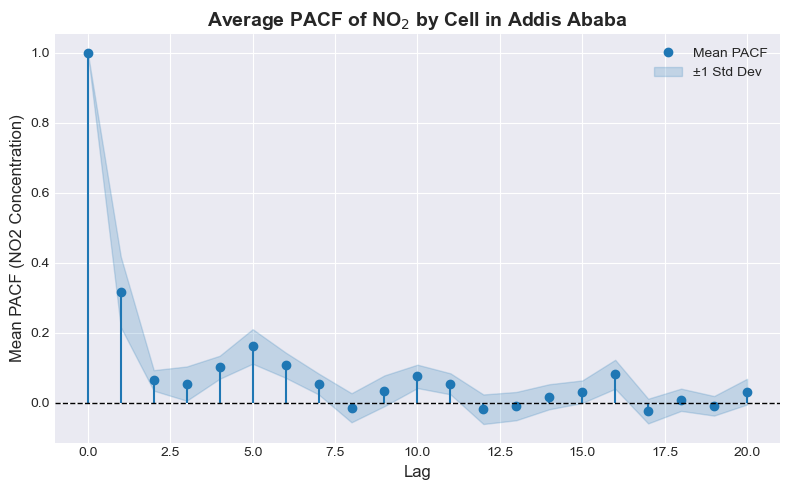

Figure saved to D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\data\demo-data


In [ ]:
from analysis import compute_pacf
from visualization import plot_mean_pacf

addis_mesh_path = DATA_PATH / "addis-mesh-data"

addis_all_pacf = compute_pacf(addis_mesh_path, nlags=20, column_name='no2_mean')
plot_mean_pacf(addis_all_pacf, 
        output_path = DEMO_PATH,
        pacf_title  = "Average PACF of NO$_2$ by Cell in Addis Ababa", 
        ylabel_name = "NO2 Concentration")

# If no data, use the following command
# show_image(DEMO_PATH / "Average PACF of NO$_2$ by Cell in Addis Ababa.png")

**Iraq - Baghdad**

NO2 PACF figure in Baghdad.

Calculating PACF for each geom_id: 100%|██████████| 6126/6126 [00:47<00:00, 130.30it/s]


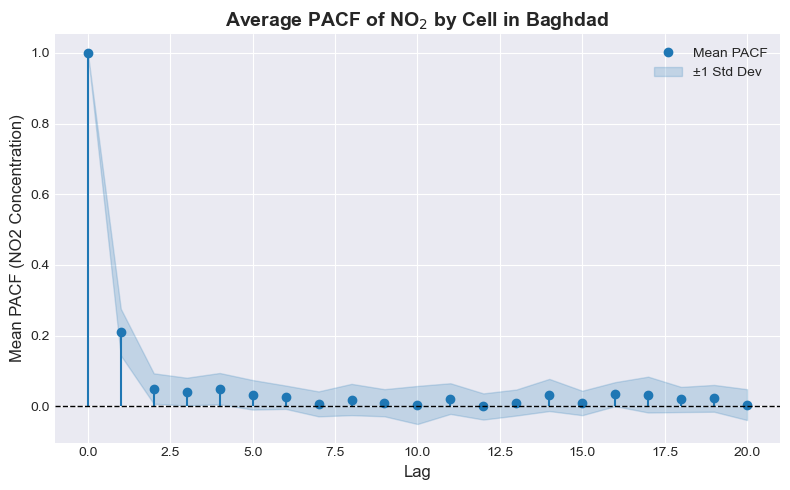

Figure saved to D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\data\demo-data


In [ ]:
from analysis import compute_pacf
from visualization import plot_mean_pacf

baghdad_mesh_path = DATA_PATH / "baghdad-mesh-data"

baghdad_all_pacf = compute_pacf(baghdad_mesh_path, nlags=20, column_name='no2_mean')
plot_mean_pacf(baghdad_all_pacf, 
        output_path = DEMO_PATH,
        pacf_title  = "Average PACF of NO$_2$ by Cell in Baghdad", 
        ylabel_name = "NO2 Concentration")

# If no data, use the following command
# show_image(DEMO_PATH / "Average PACF of NO$_2$ by Cell in Baghdad.png")

#### **ii. Spatial Auto-correlation**

In this section, we analysed the spatial autocorrelation between different cells. We use **Local Moran's I** as the metric. 

**Local Moran’s I** is a statistical method used to identify local spatial autocorrelation—that is, where values in a spatial dataset are similar or dissimilar to their neighbors. Unlike the global Moran’s I, which summarizes spatial patterns over the entire study area, the local version zooms in to assess each spatial unit individually.

This metric helps reveal:

- Clusters of high or low values (e.g., pollution hotspots or clean zones),

- Spatial outliers where a location significantly differs from its surrounding area.

For each spatial cell:

- A high positive value of Local Moran’s I suggests strong clustering (e.g., high NO₂ concentration surrounded by similarly high values).

- A negative value indicates potential spatial outliers (e.g., a high-value cell among low-value neighbors).

- A p-value derived from permutation tests indicates whether the observed spatial pattern is statistically significant.

In the visualizations, we map Local Moran’s I values to color intensity and highlight statistically significant regions, enabling intuitive identification of spatial structure and anomalies in the environmental data.

Reading GPKG files:   0%|          | 0/731 [00:00<?, ?it/s]

Reading GPKG files: 100%|██████████| 731/731 [00:11<00:00, 61.50it/s]


Figure saved to D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\data\demo-data


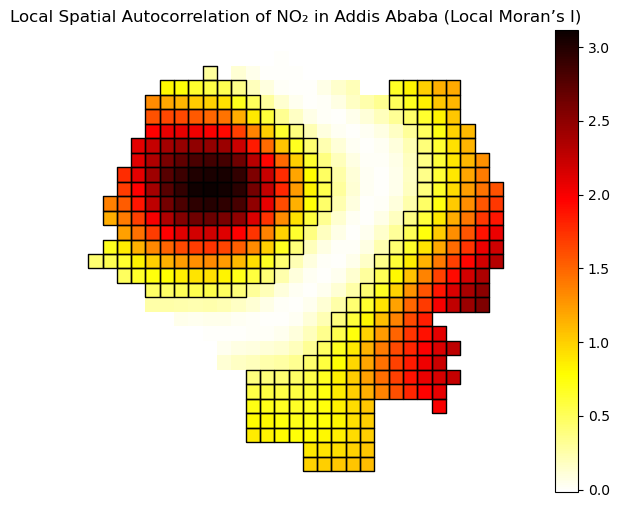

In [ ]:
from helpercollections import load_gpkgs
from analysis import average_mesh_over_time
from analysis import compute_plot_local_moran

data_folder = DATA_PATH / 'addis-mesh-data'
addis_gdfs = load_gpkgs(data_folder)
addis_mean_mesh = average_mesh_over_time(addis_gdfs)
# addis_mean_mesh.head(3)

compute_plot_local_moran(gdf=addis_mean_mesh, output_path=DEMO_PATH, feature_col='no2_mean', figsize=(8, 6), cmap='hot_r', plot_title="Local Spatial Autocorrelation of NO₂ in Addis Ababa (Local Moran’s I)")
# If no data, use the following command
# show_image(DEMO_PATH / "Local Spatial Autocorrelation of NO₂ in Addis Ababa (Local Moran’s I).png")

Reading GPKG files: 100%|██████████| 731/731 [00:54<00:00, 13.30it/s]


Figure saved to D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\data\demo-data


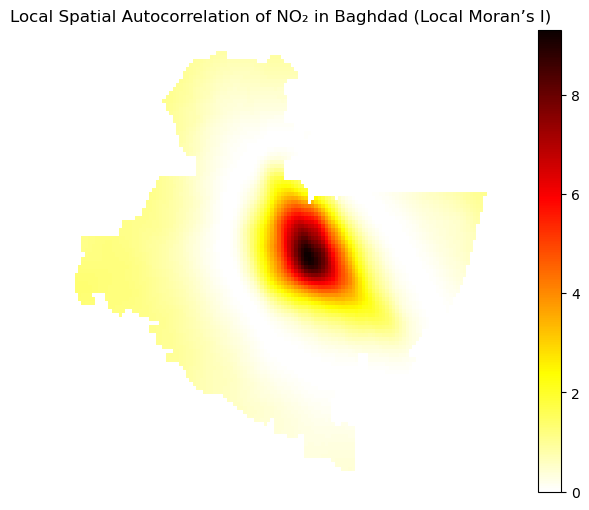

In [ ]:
from helpercollections import load_gpkgs
from analysis import average_mesh_over_time
from analysis import compute_plot_local_moran

data_folder = DATA_PATH / 'baghdad-mesh-data'
baghdad_gdfs = load_gpkgs(data_folder)
baghdad_mean_mesh = average_mesh_over_time(baghdad_gdfs)
# baghdad_mean_mesh.head(3)

compute_plot_local_moran(gdf=baghdad_mean_mesh, output_path=DEMO_PATH, feature_col='no2_mean', figsize=(8, 6), cmap='hot_r', plot_title="Local Spatial Autocorrelation of NO₂ in Baghdad (Local Moran’s I)", if_emphasize=False)
# If no data, use the following command
# show_image(DEMO_PATH / "Local Spatial Autocorrelation of NO₂ in Baghdad (Local Moran’s I).png")

#### **iii. Different Day Types Aggregation**

In this section, NO2 concentration is aggregated based on different day type, according to different working scheme in different countries.

**Addis Ababa**

In temporal analysis, we grouped days considering working schema from Ethiopia, including **Workdays**, **Weekends**.

- Type i - Workdays: Mon-Fri
- Type ii - Weekends: Sat-Sun

**Baghdad**

In temporal analysis, we grouped days considering working schema from Iraq **Mon-Tue-Wed**, **Fri-Sat**, **Thu-Sun**.

- Type i - Working days: Mon-Tue-Wed
- Type ii - Extended working days: Thu-Sun     
- Type iii - Weekends: Fri-Sat

Day type is encoded using *str* type.


In [8]:
import pandas as pd
from aggregation import compute_mean_mesh_by_daytype
# Read helper table
date_df = pd.read_csv(DATA_PATH / "helper-files" / "workday_type_2023_2024.csv", parse_dates=["Date"])
print(f'Helper Date Table:\n{date_df.head(3)}')

# Set Output path
output_path = DATA_PATH / "exploratory-data-analysis"

Helper Date Table:
        Date  Weekday Ethiopia_Workday_Type Iraq_Workday_Type
0 2023-01-01   Sunday              Weekends           Thu-Sun
1 2023-01-02   Monday              Workdays       Mon-Tue-Wed
2 2023-01-03  Tuesday              Workdays       Mon-Tue-Wed


**Ethiopia - Addis Ababa**

Calculate the average NO2 distribution in both workdays and weekends in Addis Ababa.

In [ ]:
addis_workday_average = compute_mean_mesh_by_daytype(
    date_df,
    output_path = output_path,
    feature_col = "no2_mean",
    output_name = "addis_ababa_workdays_weekends_no2_mesh.gpkg",
    meshes_path = DATA_PATH / "addis-mesh-data",
    country = "Ethiopia",
    city = "addis-ababa"
)


Saved mean meshes to D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\data\exploratory-data-analysis\addis_ababa_workdays_weekends_no2_mesh.gpkg


D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\src\aggregation.py:241: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stacked = pd.concat(frames, ignore_index=True)
D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\src\aggregation.py:241: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stacked = pd.concat(frames, ignore_index=True)


Compare the results in different workday types.

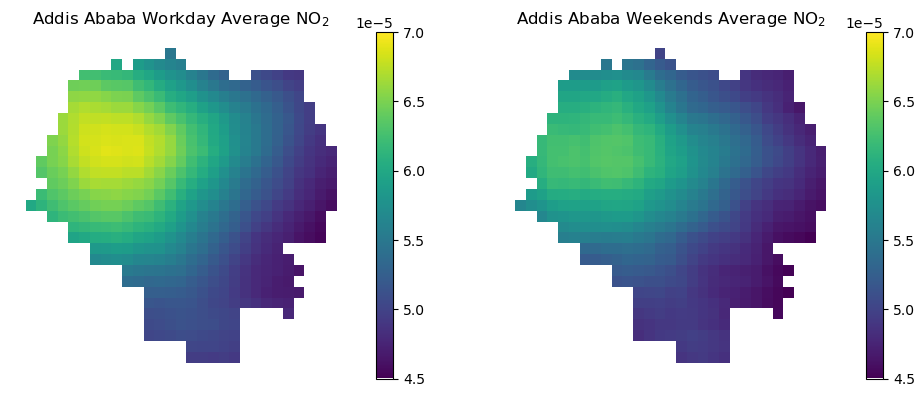

In [10]:
from visualization import plot_mesh
import geopandas as gpd
import matplotlib.pyplot as plt

addis_workday_average = gpd.read_file(DEMO_PATH / "addis_ababa_workdays_weekends_no2_mesh.gpkg")
fig, axes = plt.subplots(1,2, figsize=(10, 4))
plot_mesh(addis_workday_average, "Workdays_mean", title="Addis Ababa Workday Average NO$_2$", ax = axes[0], show_edges=False, show=False, vmin=4.5e-5, vmax=7e-5)
plot_mesh(addis_workday_average, "Weekends_mean", title="Addis Ababa Weekends Average NO$_2$", ax = axes[1], show_edges=False, show=False, vmin=4.5e-5, vmax=7e-5)
plt.tight_layout()
plt.show()

**Iraq - Baghdad**

Calculate the average NO2 distribution in different days, from Monday to Sunday in Baghdad.

In [13]:
baghdad_workday_average = compute_mean_mesh_by_daytype(
    date_df,
    output_path = output_path,
    feature_col = "no2_mean",
    output_name = "baghdad_workdays_weekends_no2_mesh.gpkg",
    meshes_path = DATA_PATH / "baghdad-mesh-data",
    country = "Iraq",
    city = "baghdad"
)


D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\src\aggregation.py:241: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stacked = pd.concat(frames, ignore_index=True)


Saved mean meshes to D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\data\exploratory-data-analysis\baghdad_workdays_weekends_no2_mesh.gpkg


Compare the results in different workday types, we have three in this Baghdad ('Mon-Tue-Wed', 'Fri-Sat' and 'Thu-Sun').

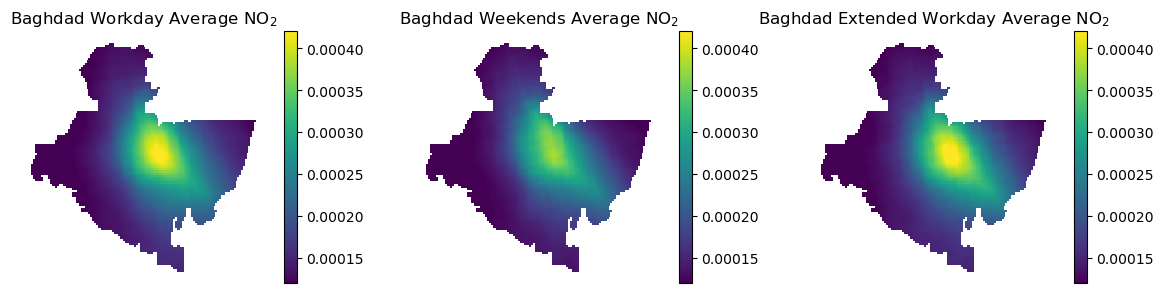

In [13]:
baghdad_workday_average = gpd.read_file(DEMO_PATH / "baghdad_workdays_weekends_no2_mesh.gpkg")
fig, axes = plt.subplots(1,3, figsize=(12, 3))
plot_mesh(baghdad_workday_average, "Mon-Tue-Wed_mean", title="Baghdad Workday Average NO$_2$", ax = axes[0], show_edges=False, show=False, vmin=1.2e-4, vmax=4.2e-4)
plot_mesh(baghdad_workday_average, "Thu-Sun_mean", title="Baghdad Extended Workday Average NO$_2$", ax = axes[2], show_edges=False, show=False, vmin=1.2e-4, vmax=4.2e-4)
plot_mesh(baghdad_workday_average, "Fri-Sat_mean", title="Baghdad Weekends Average NO$_2$", ax = axes[1], show_edges=False, show=False, vmin=1.2e-4, vmax=4.2e-4)
plt.tight_layout()
plt.show()

#### iiii. Sub Administrative Area Analysis

In [ ]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import display

In [ ]:
# Data paths and settings
data_folder = DATA_PATH / "baghdad-no2-mesh"
shapefile_path = DATA_PATH / "city-boundary/baghdad/baghdad-adm3.shp"
output_folder = DATA_PATH / "baghdad-time-series-plots/2024"
output_folder.mkdir(parents=True, exist_ok=True)


/var/folders/5f/4xtp460569d8xfc5ygcs9w500000gp/T/ipykernel_20348/2862047407.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat(time_series_data)


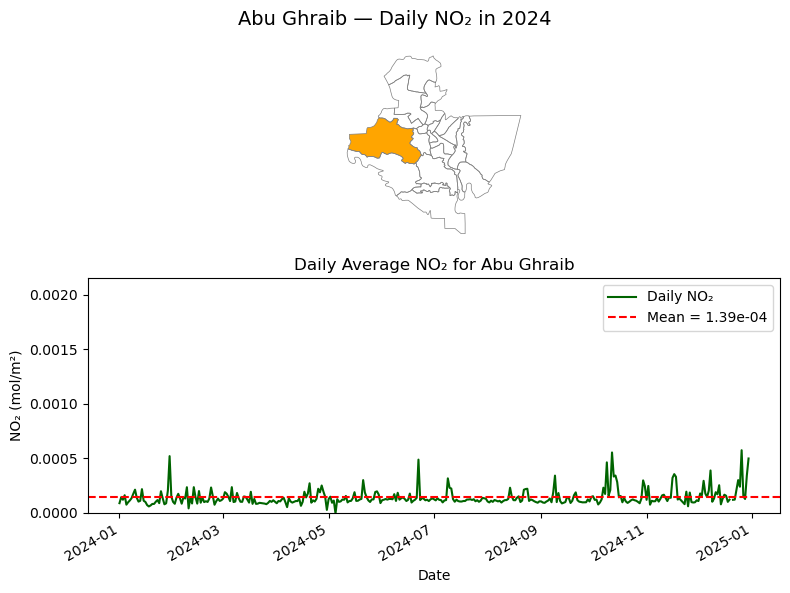

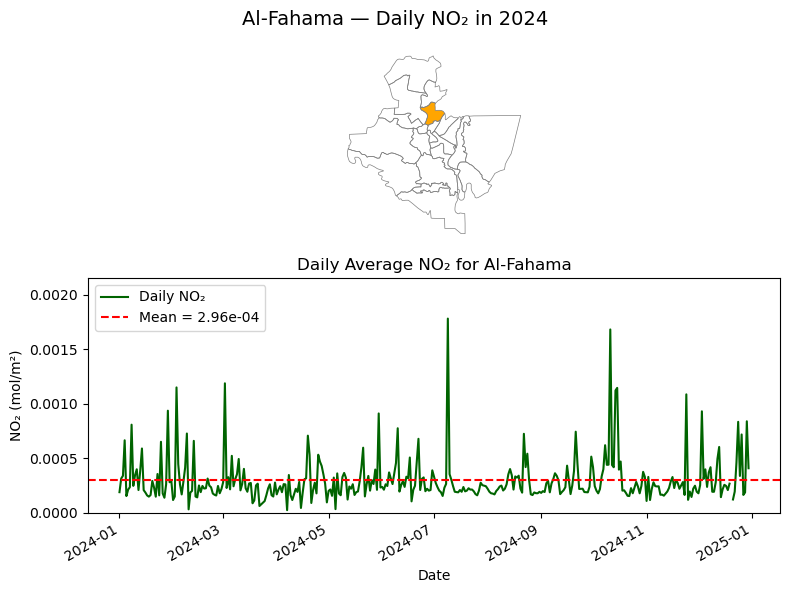

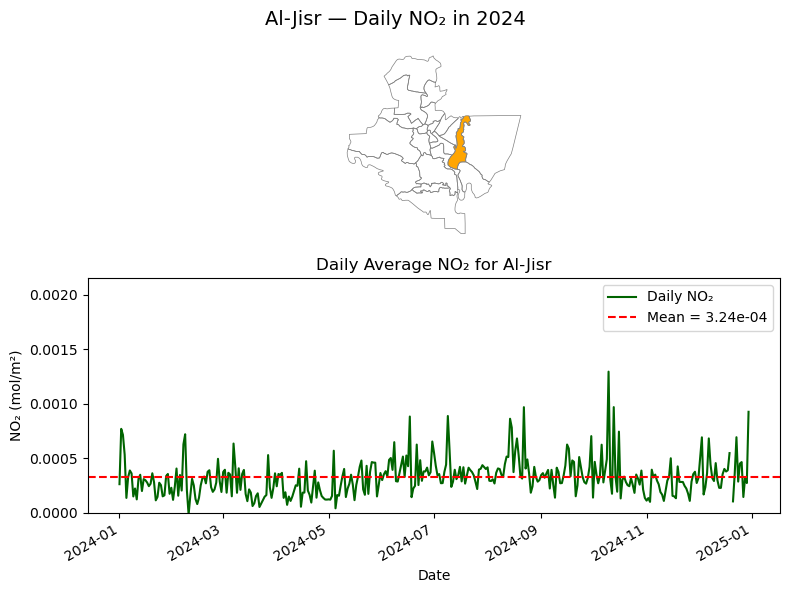

In [ ]:
# Load administrative boundary
adm3 = gpd.read_file(shapefile_path).to_crs(epsg=4326)
adm3 = adm3.reset_index(drop=True).reset_index().rename(columns={"index": "adm_id"})

# Initialize an empty list to collect daily NO2 averages
time_series_data = []

# Loop through daily GPKG files and calculate mean NO2 for each ADM3 zone
for f in sorted(os.listdir(data_folder)):
    if not f.endswith(".gpkg") or not f.startswith("baghdad-2024"):
        continue

    date_str = f.split("baghdad-")[1].replace(".gpkg", "")
    try:
        date = datetime.strptime(date_str, "%Y-%m-%d")
    except:
        continue

    gdf = gpd.read_file(os.path.join(data_folder, f))
    if gdf.empty or "no2_mean" not in gdf.columns:
        continue

    gdf = gdf[gdf.geometry.notnull() & gdf.is_valid]
    gdf = gdf.dropna(subset=["no2_mean"])
    gdf = gdf.to_crs(adm3.crs)

    joined = gpd.sjoin(gdf, adm3, how="inner", predicate="intersects")
    daily_avg = joined.groupby("adm_id")["no2_mean"].mean().reset_index()
    daily_avg["date"] = date
    time_series_data.append(daily_avg)

# panel-format dataframe
df_all = pd.concat(time_series_data)
pivot_df = df_all.pivot(index="date", columns="adm_id", values="no2_mean")

# Calculate overall max NO₂ value across all zones to standardize y-axis
ymax = pivot_df.max().max()

# Plot ADM3 zones
for i, adm_id in enumerate(pivot_df.columns):
    adm_name = adm3.loc[adm3.adm_id == adm_id, "ADM3_EN"].values[0]
    series = pivot_df[adm_id]

    fig, (ax_map, ax_line) = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={"height_ratios": [1, 1.2]})
    fig.suptitle(f"{adm_name} — Daily NO₂ in 2024", fontsize=14)

    # Top subplot: map
    adm3.boundary.plot(ax=ax_map, linewidth=0.5, edgecolor="gray")
    adm3.loc[adm3.adm_id == adm_id].plot(ax=ax_map, color="orange")
    ax_map.axis("off")

    # Bottom subplot: time series
    series.plot(ax=ax_line, color="darkgreen", label="Daily NO₂")
    mean_val = series.mean()
    ax_line.axhline(mean_val, color="red", linestyle="--", linewidth=1.5, label=f"Mean = {mean_val:.2e}")

    ax_line.set_ylabel("NO₂ (mol/m²)")
    ax_line.set_xlabel("Date")
    ax_line.set_ylim(0, ymax * 1.1)
    ax_line.set_title(f"Daily Average NO₂ for {adm_name}")
    ax_line.legend()

    plt.tight_layout()

    # Save figure
    out_path = os.path.join(output_folder, f"{adm_name.replace(' ', '_')}_baghdad_2024.png")
    #fig.savefig(out_path, dpi=100)

    # Show only the first 3 plots
    if i < 3:
        plt.show()
    else:
        plt.close()


### 1.2 Population Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# read files with relative paths
addis_2023 = pd.read_parquet(DEMO_PATH / 'addis_ababa_hex_2023_pop.parquet')
addis_2024 = pd.read_parquet(DEMO_PATH / 'addis_ababa_hex_2024_pop.parquet')
baghdad_2023 = pd.read_parquet(DEMO_PATH / 'baghdad_hex_2023_pop.parquet')
baghdad_2024 = pd.read_parquet(DEMO_PATH / 'baghdad_hex_2024_pop.parquet')
print(addis_2023.columns)

Index(['geom_id', 'geometry', 'pop_sum_m'], dtype='object')


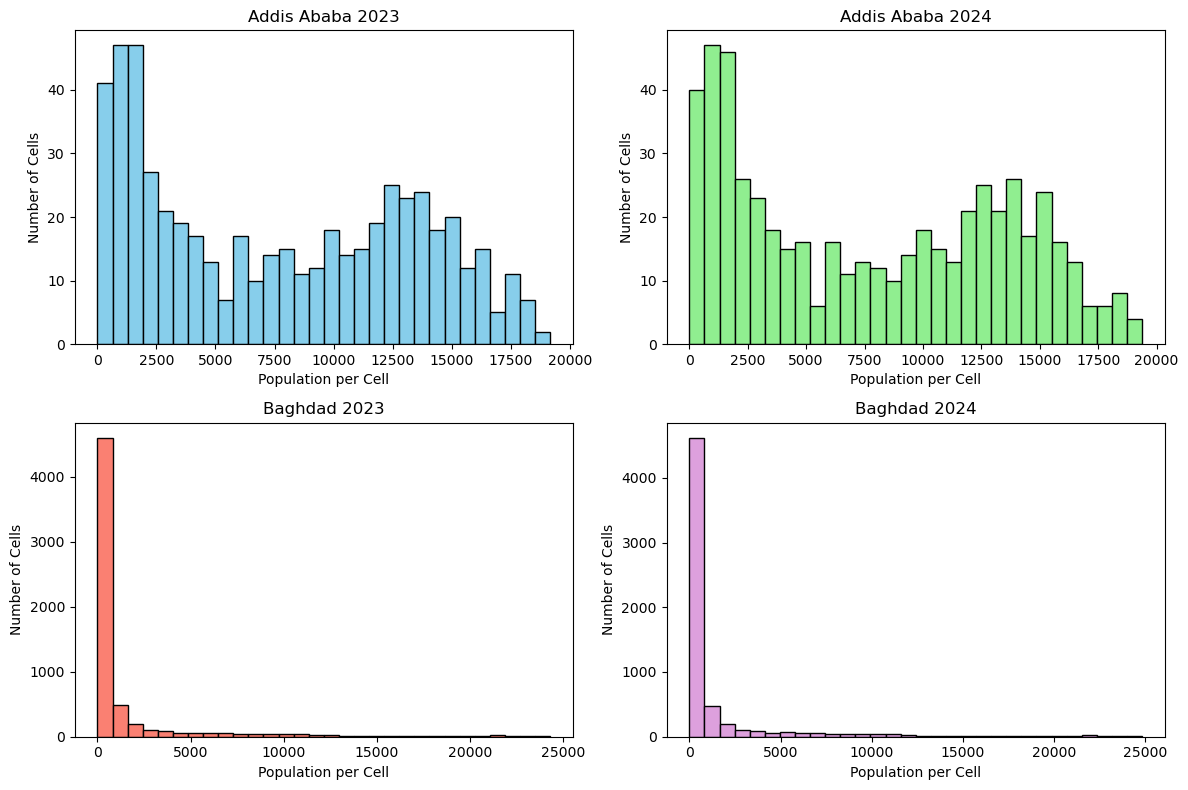

In [ ]:
# Set the name of the column that contains population values
pop_column = 'pop_sum_m'

# Create a 2x2 grid of subplots for plotting boxplots of each dataset
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Addis 2023
axes[0, 0].hist(addis_2023[pop_column], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Addis Ababa 2023')
axes[0, 0].set_xlabel('Population per Cell')
axes[0, 0].set_ylabel('Number of Cells')

# Addis 2024
axes[0, 1].hist(addis_2024[pop_column], bins=30, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Addis Ababa 2024')
axes[0, 1].set_xlabel('Population per Cell')
axes[0, 1].set_ylabel('Number of Cells')

# Baghdad 2023
axes[1, 0].hist(baghdad_2023[pop_column], bins=30, color='salmon', edgecolor='black')
axes[1, 0].set_title('Baghdad 2023')
axes[1, 0].set_xlabel('Population per Cell')
axes[1, 0].set_ylabel('Number of Cells')

# Baghdad 2024
axes[1, 1].hist(baghdad_2024[pop_column], bins=30, color='plum', edgecolor='black')
axes[1, 1].set_title('Baghdad 2024')
axes[1, 1].set_xlabel('Population per Cell')
axes[1, 1].set_ylabel('Number of Cells')

plt.tight_layout()
plt.show()


/var/folders/5f/4xtp460569d8xfc5ygcs9w500000gp/T/ipykernel_5527/2838755482.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=True)


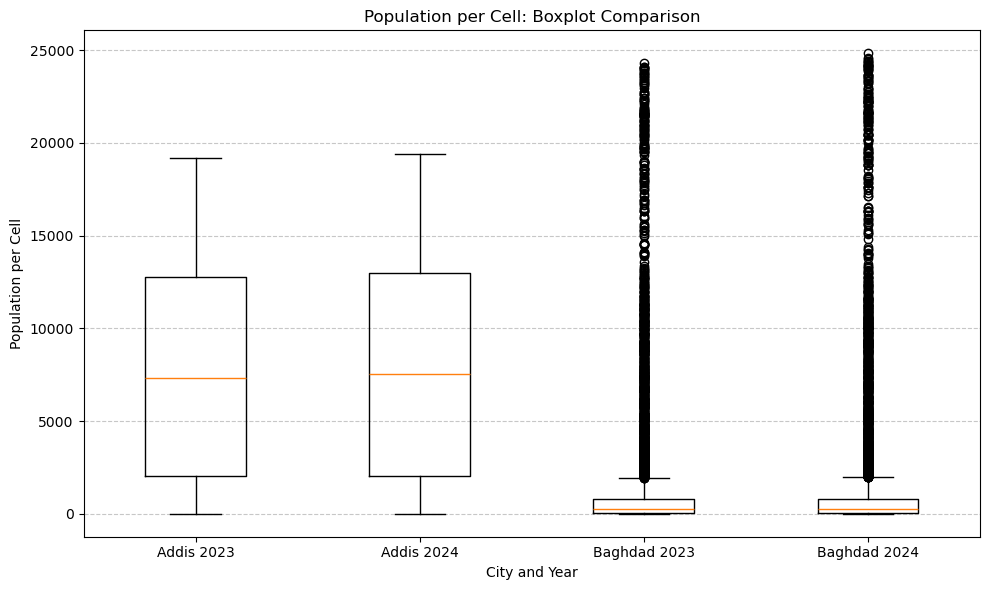

In [ ]:
# Prepare data for boxplot
data = [
    addis_2023[pop_column],
    addis_2024[pop_column],
    baghdad_2023[pop_column],
    baghdad_2024[pop_column]
]

labels = ['Addis 2023', 'Addis 2024', 'Baghdad 2023', 'Baghdad 2024']

# Plot boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels, showfliers=True)

# Add title and labels
plt.title('Population per Cell: Boxplot Comparison')
plt.ylabel('Population per Cell')
plt.xlabel('City and Year')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 2 Multivariate Data Analysis

### 2.1 Correlation Matrix

Calculate the correlation matrix and visualize it.

**Addis Ababa**

In [6]:
import pandas as pd

output_path = DATA_PATH / "demo-data"
df_addis = pd.read_parquet(DATA_PATH / 'temp' / "full_addis_df.parquet")

cols_of_interest = [
    'no2_mean', 

    # variant of no2
    'no2_lag1', 'no2_neighbor_lag1',

    # population
    'pop_sum_m', 
    
    # night time light
    'NTL_mean', 

    # climate data
    'cloud_category',
    'LST_day_mean',

    # road network
    'road_len', 'road_motorway_len',
    'road_trunk_len', 'road_primary_len', 'road_secondary_len',
    'road_tertiary_len', 'road_residential_len', 
    # 'road_share',

    # POI data
    'poi_count', 
    # 'poi_share', 

    # land use
    'lu_industrial_area', 'lu_commercial_area', 'lu_residential_area',  'lu_retail_area', 
    'lu_farmland_area',   'lu_farmyard_area', 
    'fossil_pp_count',
    'landcover_2023'
    # 'lu_industrial_share', 'lu_commercial_share', 'lu_residential_share', 'lu_retail_share', 
    # 'lu_farmyard_share', 'lu_farmland_share',
]


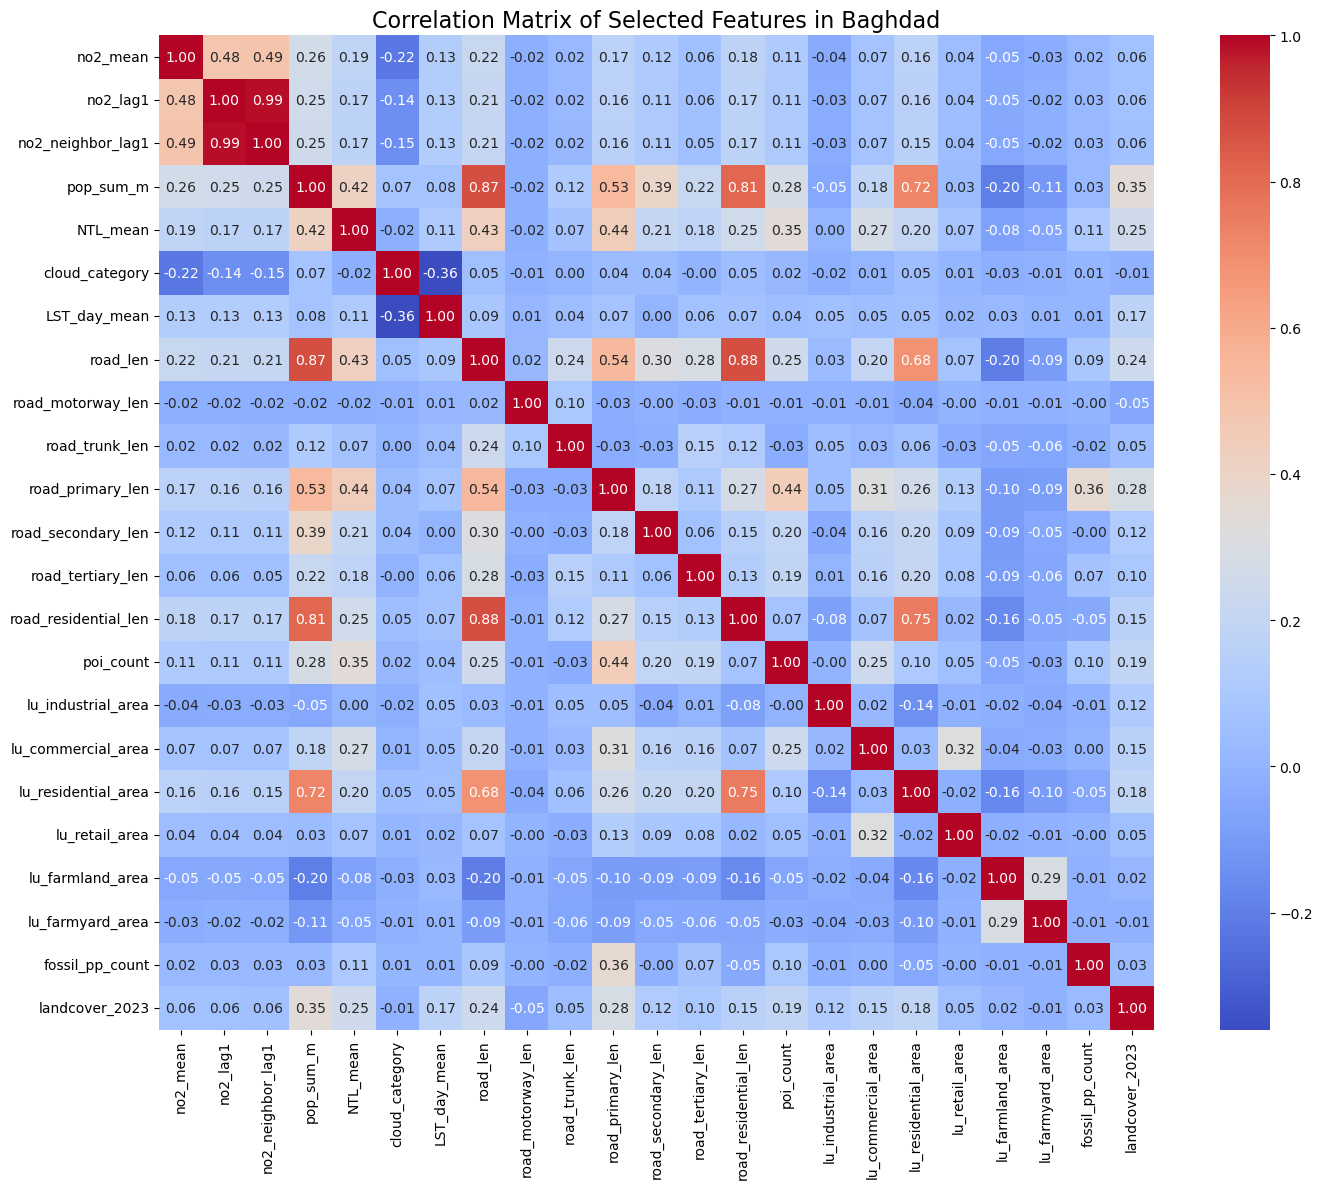

Heatmap saved to D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\data\demo-data\Correlation Matrix of Selected Features in Baghdad.png


In [7]:
from visualization import plot_corr_matrix
plot_corr_matrix(df_addis, cols_of_interest, output_path=output_path,  plot_name='Correlation Matrix of Selected Features in Baghdad')

**Baghdad**

In [ ]:
import pandas as pd

output_path = DATA_PATH / "demo-data"
df_baghdad = pd.read_parquet(DATA_PATH / 'temp' / "full_baghdad_df.parquet")

cols_of_interest = [
    'no2_mean', 
    # variant of no2
    'no2_lag1', 'no2_neighbor_lag1',

    # population
    'pop_sum_m', 

    # night time light
    'NTL_mean', 

    # mobility data
    'TCI',

    # climate data
    'cloud_category',
    'temp_mean',

    # road network
    'road_len', 'road_motorway_len',
    'road_trunk_len', 'road_primary_len', 'road_secondary_len',
    'road_tertiary_len', 'road_residential_len', 
    # 'road_share',

    # POI data
    'poi_count', 
    # 'poi_share', 

    # land use
    'lu_industrial_area', 'lu_commercial_area', 'lu_residential_area',  'lu_retail_area', 
    'lu_farmland_area',   'lu_farmyard_area', 
    'fossil_pp_count',
    'landcover_2023'
    # 'lu_industrial_share', 'lu_commercial_share', 'lu_residential_share', 'lu_retail_share', 
    # 'lu_farmyard_share', 'lu_farmland_share',
]


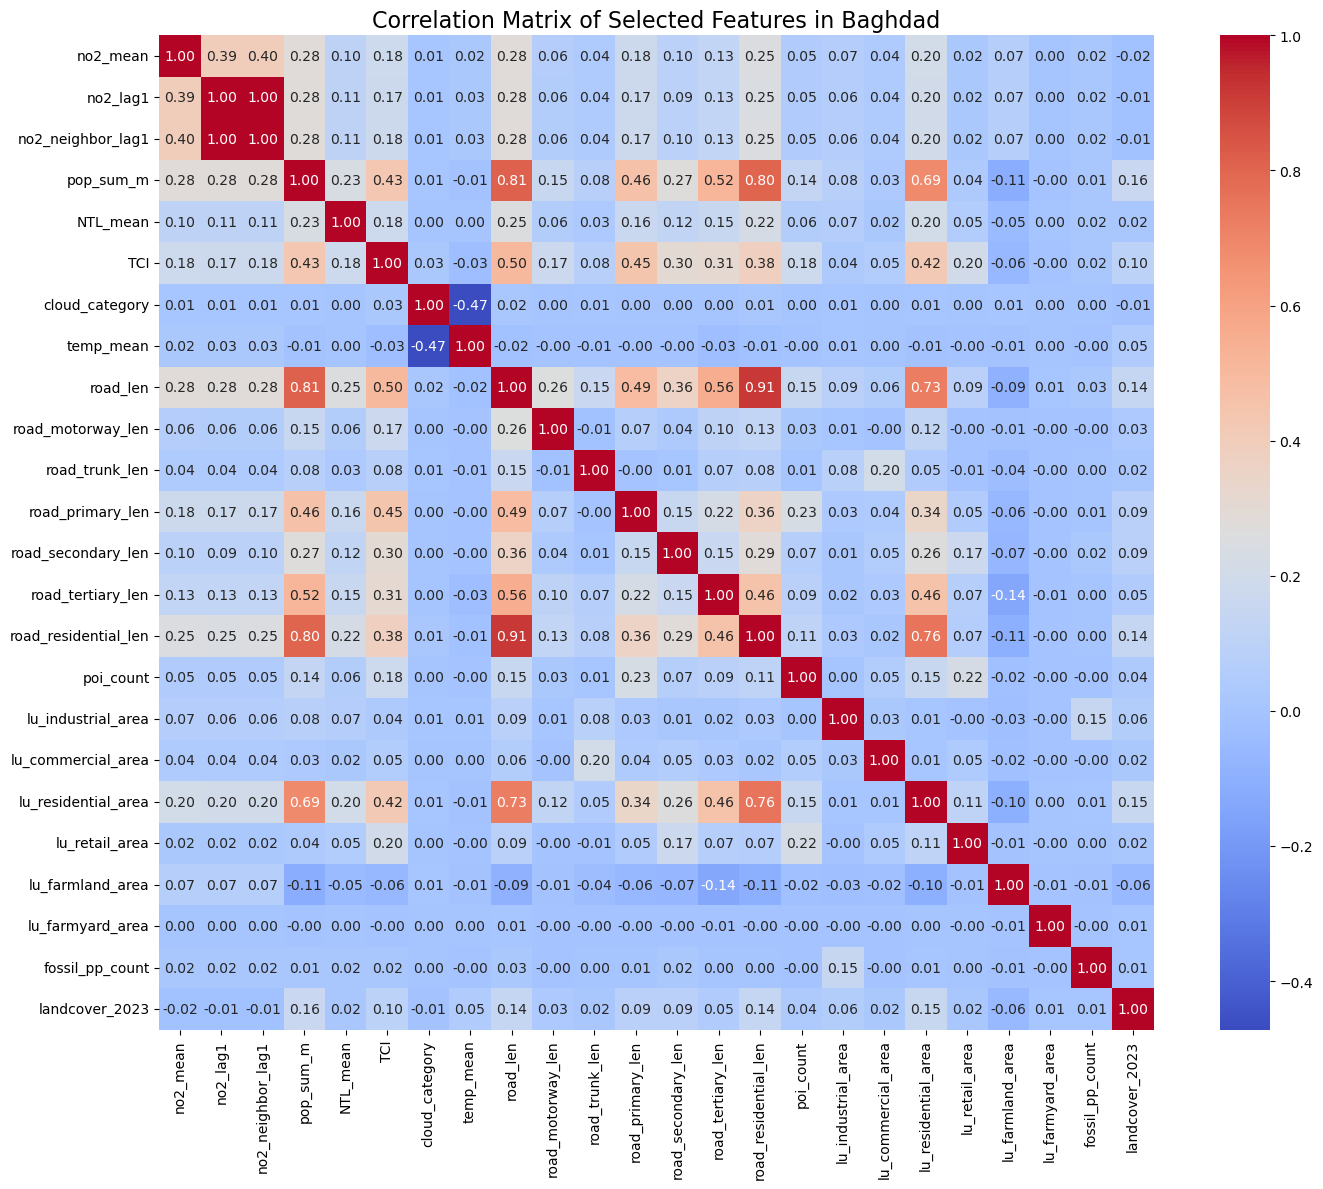

Heatmap saved to D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\data\demo-data\Correlation Matrix of Selected Features in Baghdad.png


In [4]:
from visualization import plot_corr_matrix
plot_corr_matrix(df_baghdad, cols_of_interest, output_path=output_path,  plot_name='Correlation Matrix of Selected Features in Baghdad')